## COMP5122M: Data Science

## Group project (Coursework 1): Data Science Project


# Understanding The Impact of Social Isolation and Loneliness in a Game Environment

Group member names
* Maulood Ahmad, tmpk8177@leeds.ac.uk
* Nyayesh Seyf, mwpw2517@leeds.ac.uk
* Stan Kilburn, kmgc7321@leeds.ac.uk
* Bhargav Kumar Nath, vnnh7247@leeds.ac.uk

# Dataset Description

The dataset focuses on the **behavioral and perceptual aspects of game players during the COVID-19 pandemic**, offering insights into how gaming was used as a coping mechanism for social isolation. It contains information about **640 Animal Crossing: New Horizons (ACNH) players** from **29 countries**, categorized into six major components:
1. **Socio-demographic profile:** Captures player demographics such as age, gender, and location.  
2. **COVID-19 concern:** Assesses players' concerns about the pandemic and its impact.  
3. **Environmental perception:** Evaluates players’ views on environmental issues, including attitudes toward human-centeredness, measured using the New Ecological Paradigm Scale.  
4. **Game-playing habits:** Examines frequency, duration, and patterns of gameplay during isolation.  
5. **In-game behaviors:** Investigates activities such as virtual travel and social gifting, which simulate real-world social and recreational experiences.  
6. **Game-playing feelings:** Explores the emotional impact of gaming, such as feelings of connection, stress relief, or escapism. 





## Assessment Tasks

#### a) Exploratory Data Analysis (EDA)

The EDA will focus on comprehensive investigation of player isolation characteristics through multiple perspectives:

1. **Distribution of Self-Isolation/Social Distancing Duration**
   - Analyze the overall temporal pattern of player isolation periods
   - Create visualizations showing frequency and spread of isolation lengths

2. **Regional Breakdown of Isolation Periods**
   - Examine how isolation duration varies across different regions
   - Develop comparative visualizations to highlight regional differences

3. **Correlation between Isolation Duration and Game-Playing Frequency**
   - Investigate potential relationships between time spent in isolation and gaming habits
   - Use statistical techniques to quantify and visualize these connections

4. **Comparative Analysis: Isolation Length and "Lost Connection" Sentiment**
   - Explore the correlation between isolation duration and players' feelings of disconnection
   - Analyze the frequency and intensity of the "lost connection" response across different isolation periods

#### b) In-Game Behavior Indicators

**Objective:** Identify and rank the most significant in-game behavioral markers that correlate with isolation duration:

#### c) Predictive Machine Learning Model

# 1. Distribution of Self-Isolation/Social Distancing Duration

In [1]:
import pandas as pd

# Here we read the dataframe using pandas, we choose encoding as latin-1 to specify handle special characters
df = pd.read_csv("data_640_validated.csv", encoding="latin-1")

df.head()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [2]:
# Dropping the non-required columns
df.drop(["Unnamed: 0", "ï..O1"], axis=1, inplace=True)

In [3]:
df.sample(6)

,A1_1,A1_2,A2,A3,A4,A5,A6,A7,A8,B1,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
68,American,US/Canada,Female,High school,Both,20,White,"Single, never married",A student,Yes,...,1,1,5,3,5,5,2,5,4,1
589,American,US/Canada,Female,Undergraduate school,A pet,34,White,Married or domestic partnership,Out of work but not currently looking for work,Yes,...,3,1,4,1,4,4,1,4,4,1
639,Vietnamese,Asia,Female,Undergraduate school,NaN,sub 28,Asian,"Single, never married",Employed for wages,No,...,1,1,2,3,3,2,1,2,1,1
151,American,US/Canada,Female,Undergraduate school,NaN,22,White,Married or domestic partnership,A student,Yes,...,2,1,3,1,5,5,1,5,4,3
538,FILIPINO,Asia,Female,Graduate school and higher,A pet,31,Asian,Divorced,Employed for wages,No,...,2,1,2,3,3,2,1,2,1,1
279,United States,US/Canada,Female,Undergraduate school,A pet,25,Asian,Married or domestic partnership,Employed for wages,Yes,...,3,4,4,3,3,4,4,3,3,3


In [4]:
# Checking for unique values in column `B2`
print("Unique values in 'B2':", df["B2"].unique())

Unique values in 'B2': ['More than a month' 'More than 3 weeks'
 'No self-isolation/social distancing' 'More than 2 weeks'
 'More than a week' '1 day' '5 days' '3 days' '6 days' '4 days' '7 days']


In [5]:
# Check for missing values in column 'B2'
print("Missing values in 'B2':", df["B2"].isnull().sum())

Missing values in 'B2': 0


In [6]:
def clean_duration(value):
    """
    Standardize duration values by converting weeks, months, and days to days.
    Includes explicit handling for 'No self-isolation/social distancing'.

    Args:
        value (str): Duration value to clean.

    Returns:
        int or None: Cleaned duration value in days, or None if invalid.
    """
    # Check for missing values
    if pd.isnull(value):
        return None
    
    # Convert value to lowercase
    value = str(value).strip().lower()

    try:
        # Explicitly handle "No self-isolation/social distancing"
        if value == "no self-isolation/social distancing":
            return 0
        
        # Convert weeks to days
        if "week" in value:
            num = [int(s) for s in value.split() if s.isdigit()]
            return num[0] * 7 if num else 7  # Default: 7 days
        
        # Handle day values
        elif "day" in value:
            num = [int(s) for s in value.split() if s.isdigit()]
            return num[0] if num else 1  # Default: 1 day

        # Handle month values (approximated as 30 days)
        elif "month" in value:
            num = [int(s) for s in value.split() if s.isdigit()]
            return num[0] * 30 if num else 30  # Default: 30 days

        # Return None for unsupported duration units
        else:
            return None
        
    except ValueError:
        # Return None for invalid values
        return None

# Apply cleaning function to the "B2" column
df["B2_cleaned"] = df["B2"].apply(clean_duration)

# Remove rows with missing cleaned values
df_cleaned = df.dropna(subset=["B2_cleaned"])

# Display cleaned data
print(df_cleaned[["B2", "B2_cleaned"]].head())


                  B2  B2_cleaned
0  More than a month          30
1  More than a month          30
2  More than a month          30
3  More than a month          30
4  More than 3 weeks          21


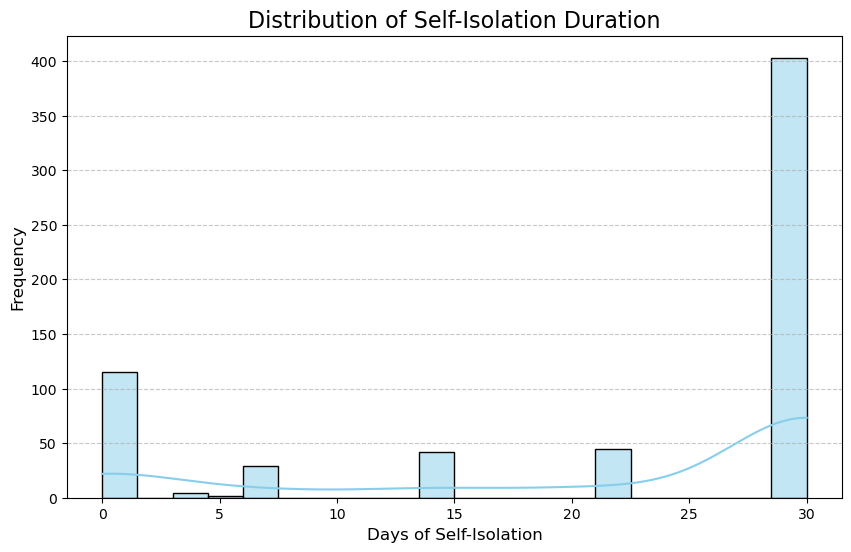

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram, bins specifies number of equal width bins to divide the data into
# kde plots the probability density function
plt.figure(figsize=(10, 6))
sns.histplot(df["B2_cleaned"], bins=20, kde=True, color="skyblue")

# Customizable plot title and labels
plt.title("Distribution of Self-Isolation Duration", fontsize=16)
plt.xlabel("Days of Self-Isolation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The histogram shows a highly skewed distribution, with a large peak around 30 days of self isolation. This indicated that many players spent close to a month in isolation

In [8]:
# Calculate basic statistics
print("Summary statistics for self-isolation duration (in days):")
print(df_cleaned["B2_cleaned"].describe())

Summary statistics for self-isolation duration (in days):
count    640.000000
mean      21.645312
std       12.026997
min        0.000000
25%       14.000000
50%       30.000000
75%       30.000000
max       30.000000
Name: B2_cleaned, dtype: float64


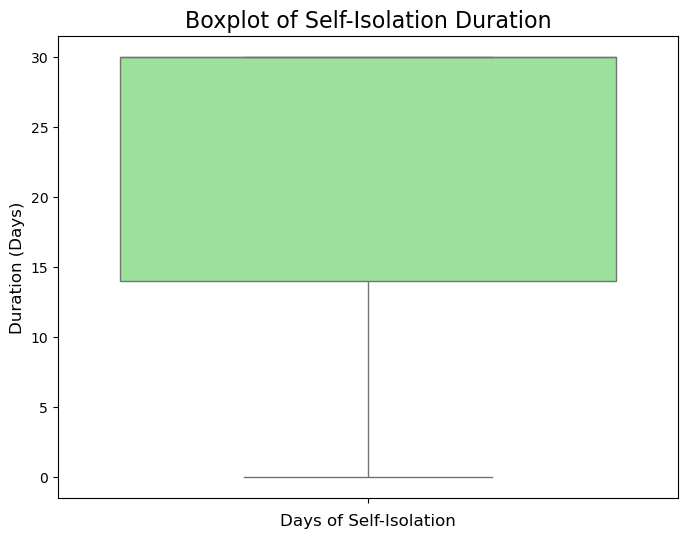

In [9]:
# Boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df_cleaned["B2_cleaned"], color="lightgreen")

# Customiza plot title and labels
plt.title("Boxplot of Self-Isolation Duration", fontsize=16)
plt.xlabel("Days of Self-Isolation", fontsize=12)
plt.ylabel('Duration (Days)', fontsize=12)
plt.show()

The boxplot shows a uniform distribution of self-isolation duration, with all players spending approximately the same number of days in isolation, likely around 15-30 days.